## GAME ENGAGEMENT PREDICTION

### Importing Libraries

In [1]:
import sys,os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,
                              GradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,
                             confusion_matrix,classification_report,roc_auc_score,roc_curve)
from sklearn.model_selection import cross_val_score

### Importing Dataset

In [2]:
df=pd.read_csv(r'C:\Users\VAIBHAV\Downloads\online_gaming_behavior_dataset.csv')

### Data Exploration

In [3]:
# Looking at the first 4 Records of the dataset
df.head(4)

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium

In [4]:
# Looking at last 3 record of the dataset
df.tail(3)

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  \
40031     49031   15  Female      USA       RPG       0.240057   
40032     49032   34    Male      USA    Sports      14.017818   
40033     49033   19    Male      USA    Sports      10.083804   

       InGamePurchases GameDifficulty  SessionsPerWeek  \
40031                1           Easy               10   
40032                1         Medium                3   
40033                0           Easy               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

      EngagementLevel  
40031            High  
40032          Medium  
40033          Medium

In [5]:
df.sample(2)

PlayerID  Age  Gender Location   GameGenre  PlayTimeHours  \
38863     47863   41  Female      USA  Simulation      10.733632   
25365     34365   29  Female      USA    Strategy       5.989988   

       InGamePurchases GameDifficulty  SessionsPerWeek  \
38863                0           Easy               16   
25365                0           Hard                2   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
38863                        152           58                    32   
25365                         25           23                     0   

      EngagementLevel  
38863            High  
25365             Low

In [6]:
# shape of the dataset
df.shape

(40034, 13)

In [7]:
# Number of rows and columns of dataset
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 40034
Number of Columns: 13


In [8]:
# A quick summary/overview of dataset 
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 40034  │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0        ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ PlayerID              │   0 │     0 │  29020 │  11560 │      9000 │ 19010 │ 29020 │ 39020 │ 49030 │ ▇▇▇▇▇▇ │  │
│ │ Age                   │   0 │     0 │  31.99 │  10.04 │        15 │    23 │    32 │    41 │    49 │ ▇▇▇▇▇▇ │  │
│ │ PlayTimeHours         │   0 │     0 │  12.02 │  6.915 │ 0.0001147 │ 6.068 │ 12.01 │ 17.96 │    24 │ ▇▇▇▇▇▇ │  │
│ │ InGamePurchases       │   0 │     0 │ 0.2009 │ 0.4006 │         0 │     0 │     0 │     0 │     1 │ ▇    ▂ │  │
│ │ SessionsPerWeek       │   0 │     0 │  9.472 │  5.764 │         0 │     4 │     9 │    14 │    19 │ ▇▆▆▆▆▇ │  │
│ │ AvgSessionDurationMin │   0 │     0 │  94.79 │  49.01 │        10 │    52 │    95 │   137 │   179 │ ▇▇▇▇▇▇ │  │
│ │ utes                  │     │       │        │        │           │       │       │       │       │        │  │
│ │ PlayerLevel           │   0 │     0 │  49.66 │  28.59 │         1 │    25 │    49 │    74 │    99 │ ▇▇▇▇▇▇ │  │
│ │ AchievementsUnlocked  │   0 │     0 │  24.53 │  14.43 │         0 │    12 │    25 │    37 │    49 │ ▇▇▇▇▇▇ │  │
│ └───────────────────────┴─────┴───────┴────────┴────────┴───────────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                          │      0 │          0 │                          1 │                 40034 │  │
│ │ Location                        │      0 │          0 │                          1 │                 40034 │  │
│ │ GameGenre                       │      0 │          0 │                          1 │                 40034 │  │
│ │ GameDifficulty                  │      0 │          0 │                          1 │                 40034 │  │
│ │ EngagementLevel                 │      0 │          0 │                          1 │                 40034 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
# looking at column names
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [11]:
# Checking for null values
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

##### There are no null values in the dataset

In [12]:
# checking for duplicates
df.duplicated().sum()

0

In [13]:
# Dropping column PlayerId as it is not significant for model building
df.drop('PlayerID',axis=1,inplace=True)

In [14]:
# Separating numerical and categorical columns
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include='object')

In [15]:
# unique values of categorical column
for i in df_cat.columns:
    print(i,df[i].unique())
    print('**********************************')

Gender ['Male' 'Female']
**********************************
Location ['Other' 'USA' 'Europe' 'Asia']
**********************************
GameGenre ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']
**********************************
GameDifficulty ['Medium' 'Easy' 'Hard']
**********************************
EngagementLevel ['Medium' 'High' 'Low']
**********************************


In [16]:
df['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [17]:
# unique values of numerical column
for i in df_num.columns:
    print(i,df[i].unique())
    print('**********************************')

Age [43 29 22 35 33 37 25 38 17 36 16 44 47 26 39 41 42 30 21 23 32 18 28 40
 34 49 31 20 48 24 45 15 19 27 46]
**********************************
PlayTimeHours [16.27111876  5.52596138  8.22375524 ...  0.24005688 14.01781798
 10.08380358]
**********************************
InGamePurchases [0 1]
**********************************
SessionsPerWeek [ 6  5 16  9  2  1 10 13  8  0  3  4 18 14 12 19 17 11 15  7]
**********************************
AvgSessionDurationMinutes [108 144 142  85 131  81  50  48 101  95 124  18 156  41 154 135  56 177
 159 120 117 161  82 118  57 155  67  70 127 166  28  61 112 116  43 151
  68 115 149  65 176  31  77  94 146  45 134 171  46 139  36 148 153 138
 140  16  49  30 167  79 111 109 106  29  83  14  34 102 122 147 107  73
  12  99  32 126  84  55  93  40  33  91  24  72  96 121  60 145  51  69
  75  17  62 157  78  21  42 103  52 132 105  27  19  39  92 179 164  90
 110 133  98  89  80  47  20  10 152 128  71 175  88 125  74 168  76 169
 172 170 150  23  

In [18]:
# Statistical summary of numerical columns
df_num.describe()

Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
count  40034.000000   40034.000000     40034.000000     40034.000000   
mean      31.992531      12.024365         0.200854         9.471774   
std       10.043227       6.914638         0.400644         5.763667   
min       15.000000       0.000115         0.000000         0.000000   
25%       23.000000       6.067501         0.000000         4.000000   
50%       32.000000      12.008002         0.000000         9.000000   
75%       41.000000      17.963831         0.000000        14.000000   
max       49.000000      23.999592         1.000000        19.000000   

       AvgSessionDurationMinutes   PlayerLevel  AchievementsUnlocked  
count               40034.000000  40034.000000          40034.000000  
mean                   94.792252     49.655568             24.526477  
std                    49.011375     28.588379             14.430726  
min                    10.000000      1.000000              0.000000  
25%                    52.000000     25.000000             12.000000  
50%                    95.000000     49.000000             25.000000  
75%                   137.000000     74.000000             37.000000  
max                   179.000000     99.000000             49.000000

In [19]:
df_cat.describe()

Gender Location GameGenre GameDifficulty EngagementLevel
count   40034    40034     40034          40034           40034
unique      2        4         5              3               3
top      Male      USA    Sports           Easy          Medium
freq    23959    16000      8048          20015           19374

### Pandas Profiling

In [20]:
# This will give the detailed summary of the dataset
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title='myfile')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# data extraction using boolean indexing
# looking at only male gamers from asia
df[(df['Gender']=='Male') & (df['Location']=='Asia')].head(3)

Age Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
16   35   Male     Asia  Strategy      17.887898                0   
45   20   Male     Asia       RPG      16.585329                0   
71   15   Male     Asia  Strategy      18.850359                0   

   GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
16           Easy               16                        154           62   
45         Medium               19                         65           34   
71         Medium                7                        111           45   

    AchievementsUnlocked EngagementLevel  
16                     4            High  
45                    46          Medium  
71                     2          Medium

In [22]:
# df.style.background_gradient(cmap='viridis')

### Data Visualization

Text(-12.430555555555555, 0.5, 'Count of players')

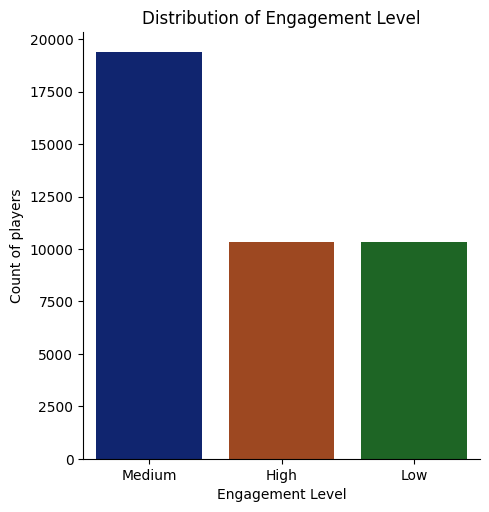

In [23]:
# plt.style.use('dark_background')
sns.catplot(df,x='EngagementLevel',kind='count',palette='dark')
plt.title('Distribution of Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Count of players')

In [24]:
# for i in df_cat.columns:
#     plt.figure()
#     sns.countplot(df,y=i,palette='colorblind',order=df[i].value_counts().index)
#     plt.title(f'count of {i}')
#     plt.show()

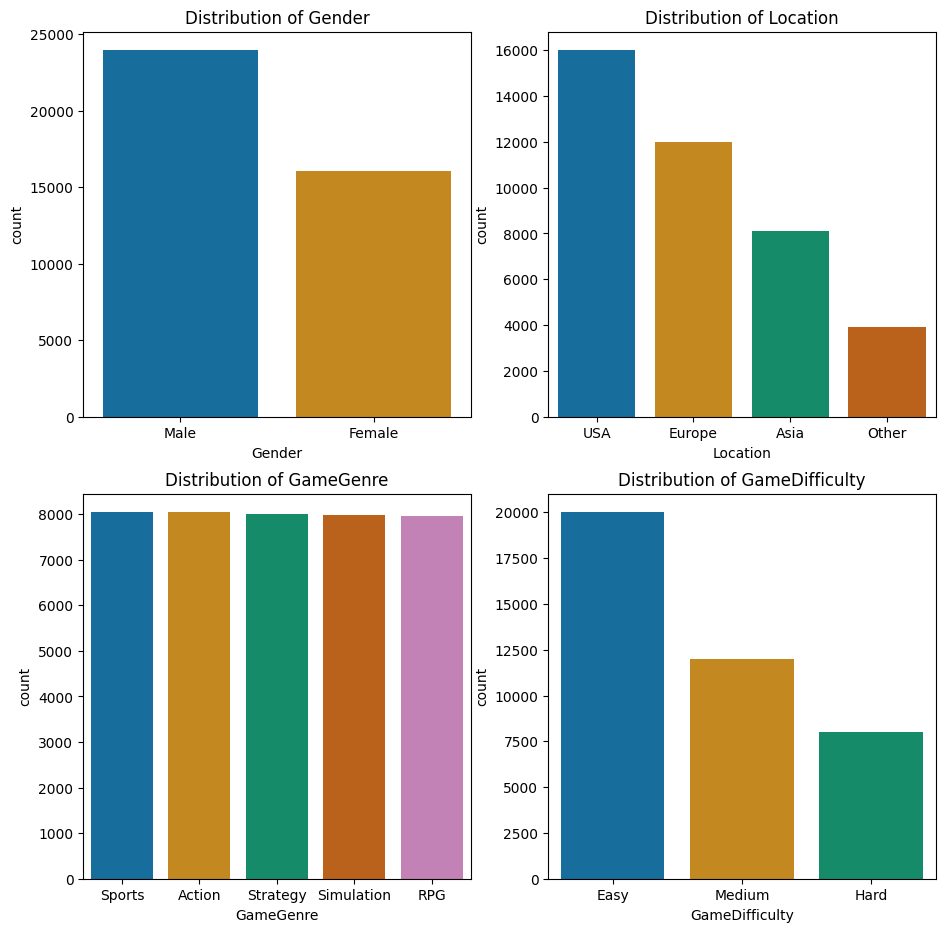

In [25]:
fig,axes = plt.subplots(2,2,figsize=(11,11))

ax=sns.countplot(ax=axes[0, 0],x='Gender',data=df,palette='colorblind',order=df['Gender'].value_counts().index)
axes[0, 0].set_title('Distribution of Gender')

ax=sns.countplot(ax=axes[0, 1],x='Location',data=df,palette='colorblind',order=df['Location'].value_counts().index)
axes[0, 1].set_title('Distribution of Location')

ax=sns.countplot(ax=axes[1, 0],x='GameGenre',data=df,palette='colorblind',order=df['GameGenre'].value_counts().index)
axes[1, 0].set_title('Distribution of GameGenre')

ax=sns.countplot(ax=axes[1, 1],x='GameDifficulty',data=df,palette='colorblind',order=df['GameDifficulty'].value_counts().index)
axes[1, 1].set_title('Distribution of GameDifficulty')
plt.show()

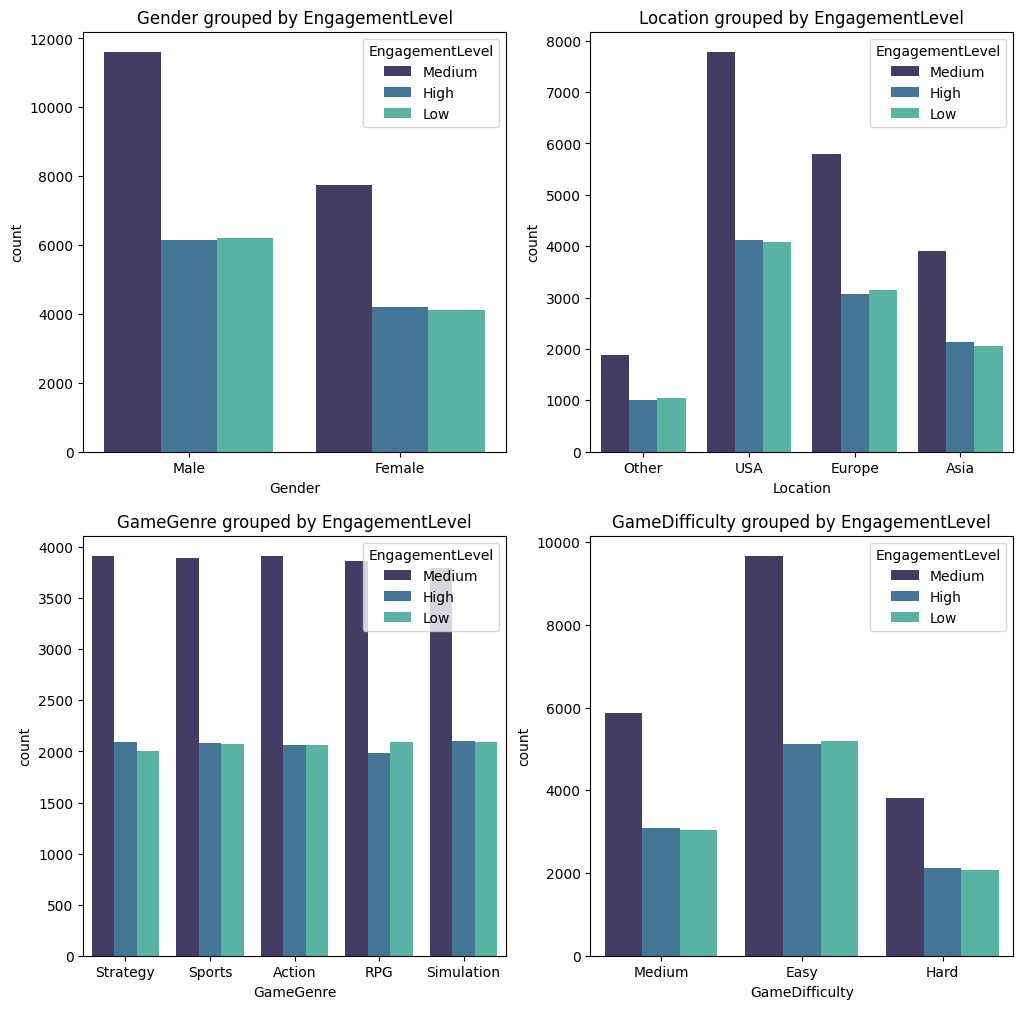

In [26]:
fig,axes = plt.subplots(2, 2, figsize=(12,12))

# Gender grouped by EngagementLevel
ax=sns.countplot(ax=axes[0, 0], x='Gender', hue='EngagementLevel',data=df,palette='mako')
axes[0, 0].set_title('Gender grouped by EngagementLevel')

# Location grouped by EngagementLevel
ax=sns.countplot(ax=axes[0, 1], x='Location', hue='EngagementLevel',data=df,palette='mako')
axes[0, 1].set_title('Location grouped by EngagementLevel')

# GameGenre grouped by EngagementLevel
ax=sns.countplot(ax=axes[1, 0], x='GameGenre', hue='EngagementLevel',data=df,palette='mako')
axes[1, 0].set_title('GameGenre grouped by EngagementLevel')

# GameDifficulty grouped by EngagementLevel
ax=sns.countplot(ax=axes[1, 1], x='GameDifficulty',hue='EngagementLevel',data=df,palette='mako')
axes[1, 1].set_title('GameDifficulty grouped by EngagementLevel')
plt.show()

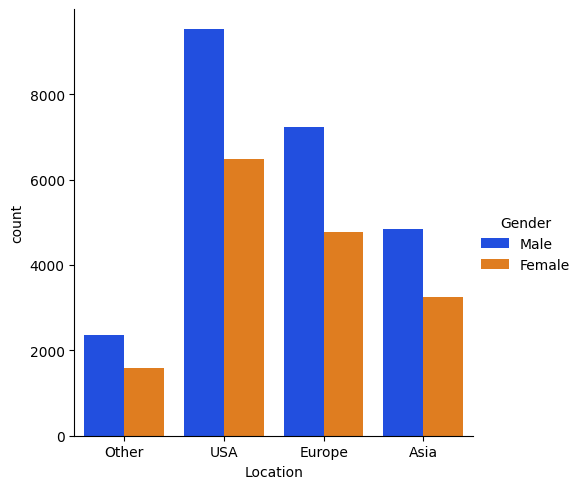

In [27]:
sns.catplot(df,x='Location',kind='count',hue='Gender',palette='bright')

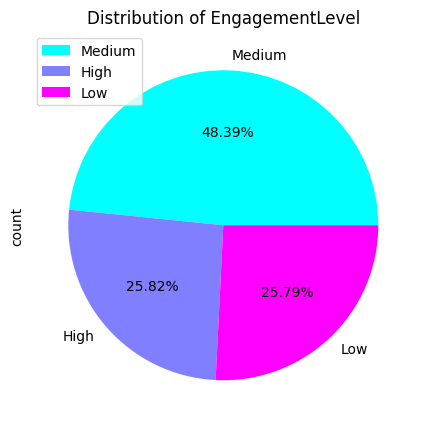

In [28]:
# pie chart
plt.figure(figsize=(5,6))
df['EngagementLevel'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f%%',cmap='cool')
plt.title('Distribution of EngagementLevel')
plt.legend(['Medium','High','Low'])
plt.show()

Text(0.5, 1.0, 'Age Distribution')

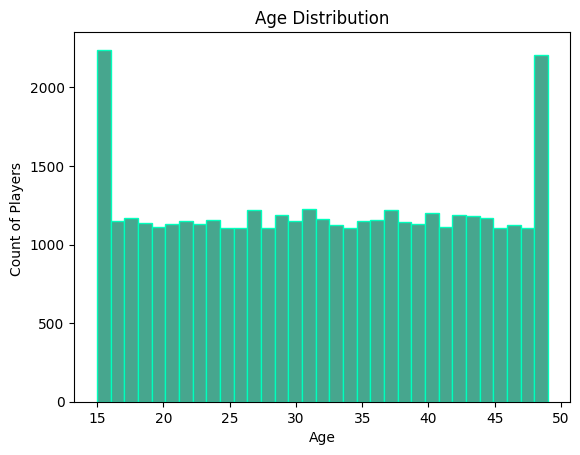

In [29]:
# distribution of age
sns.histplot(df['Age'],color='#098968',edgecolor='#00FFBD')
plt.ylabel('Count of Players ')
plt.title('Age Distribution')

Text(0, 0.5, 'Count of Players ')

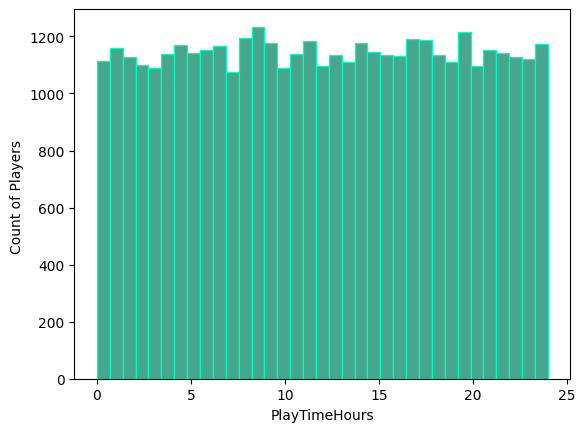

In [30]:
# distibution of playtime hours
sns.histplot(df['PlayTimeHours'],color='#098968',edgecolor='#00FFBD')
plt.ylabel('Count of Players ')

In [31]:
df.head()

Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0   43    Male    Other  Strategy      16.271119                0   
1   29  Female      USA  Strategy       5.525961                0   
2   22  Female      USA    Sports       8.223755                0   
3   35    Male      USA    Action       5.265351                1   
4   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

Text(0.5, 1.0, 'SessionsPerWeek based on EngagementLevel')

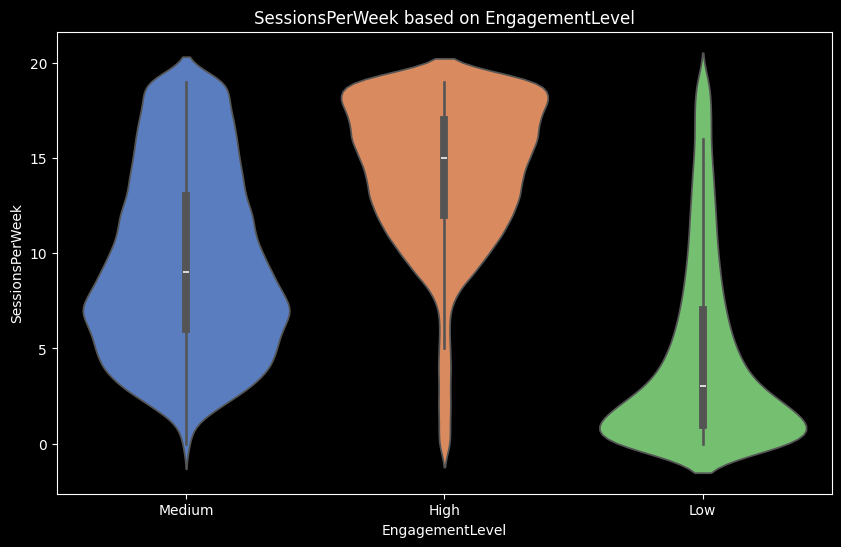

In [32]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.violinplot( data=df,x='EngagementLevel', y='SessionsPerWeek',hue='EngagementLevel',palette='muted')
plt.title('SessionsPerWeek based on EngagementLevel')  #color='#098968',

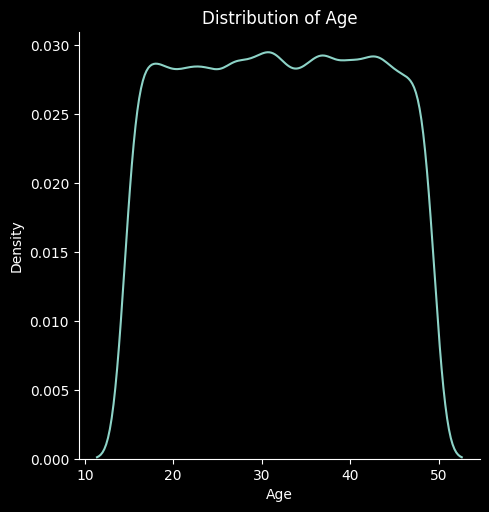

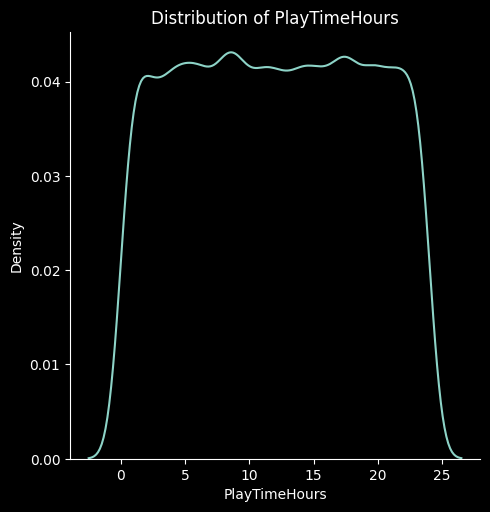

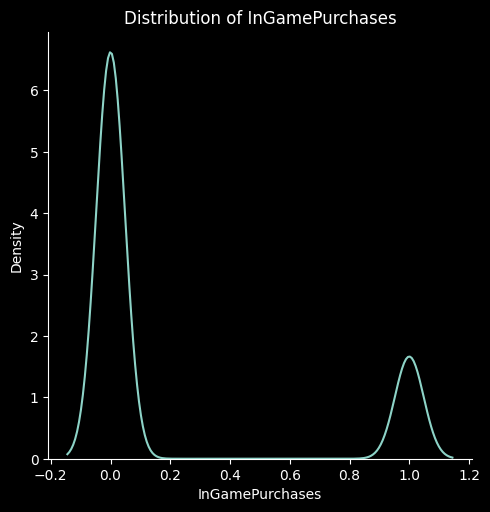

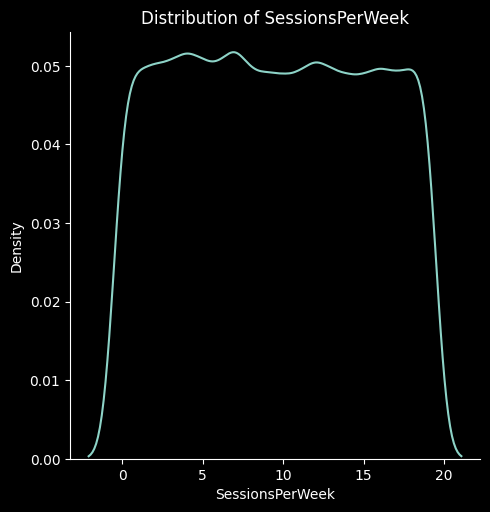

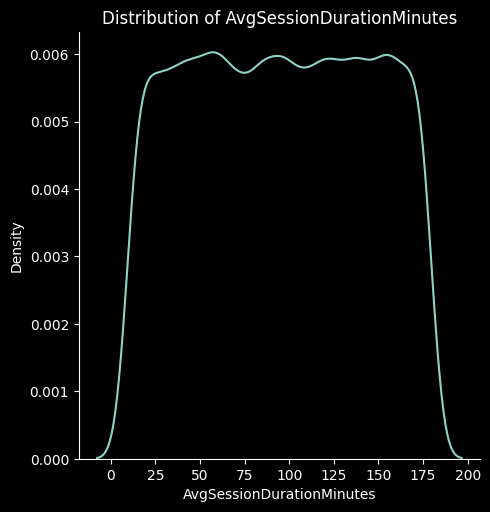

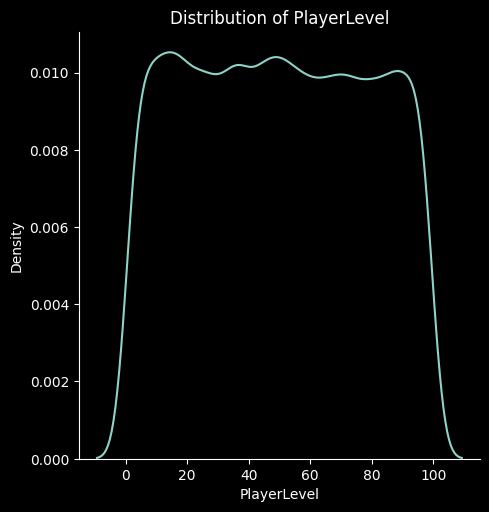

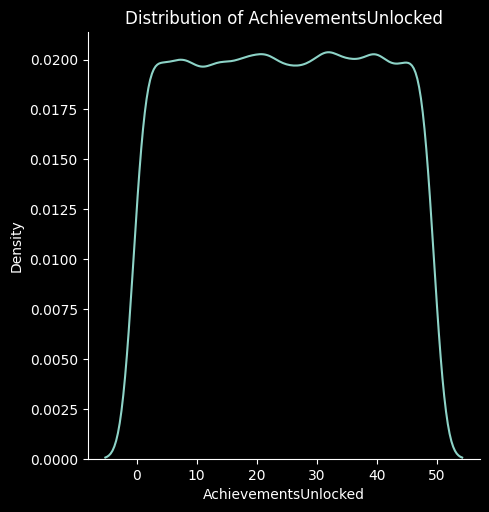

In [33]:
# distribution plot
for i in df_num.columns:
    sns.displot(df[i],kind='kde')
    plt.title(f'Distribution of {i}')

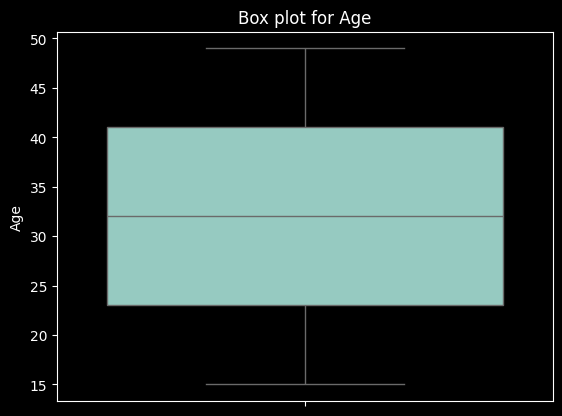

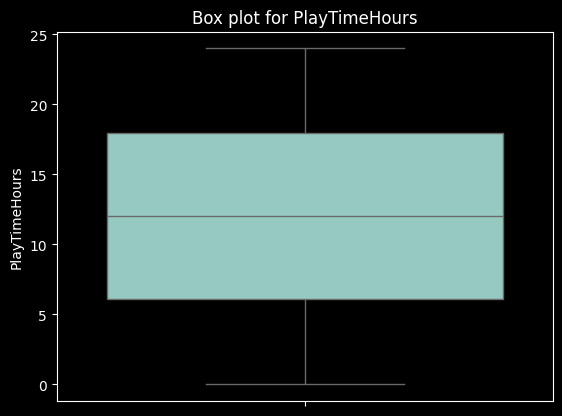

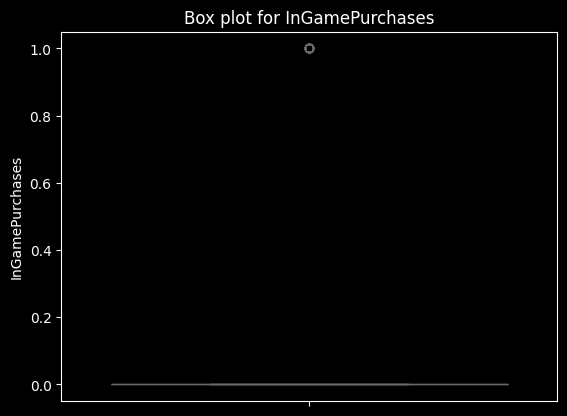

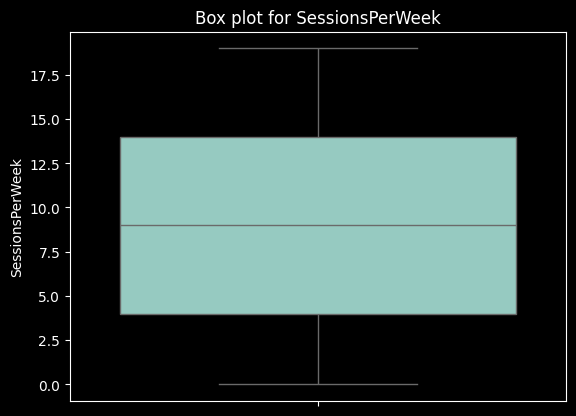

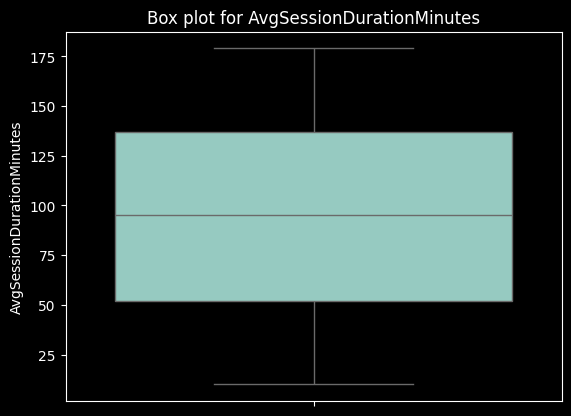

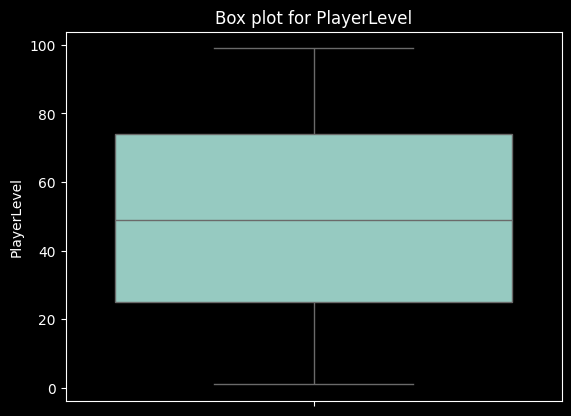

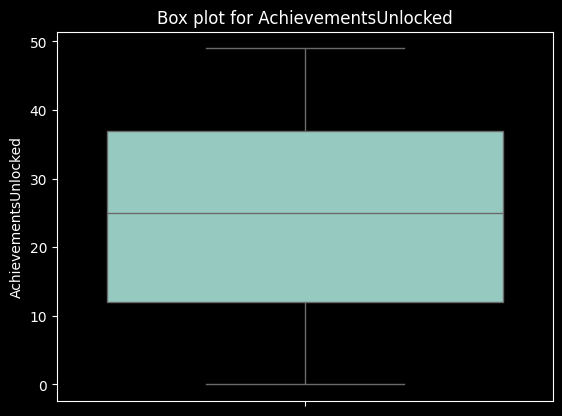

In [34]:
# boxplot
for i in df_num.columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.title(f'Box plot for {i}')
    plt.show()

### Data Preprocessing

In [35]:
# Encoding for categorical columns
# label encoding for target columns Engagement Level and gender
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['EngagementLevel']=le.fit_transform(df['EngagementLevel'])
df['Gender']=le.fit_transform(df['Gender'])

In [36]:
df_cat.columns

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')

In [37]:
# one hot encoding for all other categorical columns
df=pd.get_dummies(data=df,columns=['Location','GameGenre','GameDifficulty'],dtype='int')

In [38]:
# display all columns
pd.set_option('display.max_columns',None)

In [39]:
# dropping last columns of the one hot coded feature to avoid multicollinearity
df.drop(['Location_USA','GameGenre_Strategy','GameDifficulty_Medium'],inplace=True,axis=1)

In [40]:
# or
# Df = pd.get_dummies(df,columns=["Location","GameGenre","GameDifficulty"],drop_first=True)

In [41]:
df.head(3)

Age  Gender  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
0   43       1      16.271119                0                6   
1   29       0       5.525961                0                5   
2   22       0       8.223755                0               16   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                        108           79                    25   
1                        144           11                    10   
2                        142           35                    41   

   EngagementLevel  Location_Asia  Location_Europe  Location_Other  \
0                2              0                0               1   
1                2              0                0               0   
2                0              0                0               0   

   GameGenre_Action  GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  \
0                 0              0                     0                 0   
1                 0              0                     0                 0   
2                 0              0                     0                 1   

   GameDifficulty_Easy  GameDifficulty_Hard  
0                    0                    0  
1                    0                    0  
2                    1                    0

In [42]:
# # Heatmap
# plt.figure(figsize=(12,10))
# plt.style.use('dark_background')
# sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='white',cmap='Greens')

### Seperating x and y


In [43]:
# Here we will seperate x (independent features) and y (dependent feature) also called the target variable

In [44]:
x=df.drop('EngagementLevel',axis=1)
y=df['EngagementLevel']

In [45]:
x.head(3)

Age  Gender  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
0   43       1      16.271119                0                6   
1   29       0       5.525961                0                5   
2   22       0       8.223755                0               16   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                        108           79                    25   
1                        144           11                    10   
2                        142           35                    41   

   Location_Asia  Location_Europe  Location_Other  GameGenre_Action  \
0              0                0               1                 0   
1              0                0               0                 0   
2              0                0               0                 0   

   GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  GameDifficulty_Easy  \
0              0                     0                 0                    0   
1              0                     0                 0                    0   
2              0                     0                 1                    1   

   GameDifficulty_Hard  
0                    0  
1                    0  
2                    0

In [46]:
y.head(3)

0    2
1    2
2    0
Name: EngagementLevel, dtype: int32

### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

# Model Building

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred_tr=LR.predict(x_train)
y_pred_tst=LR.predict(x_test)

## Testing and Training Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score on Training Set (Linear Regression):',accuracy_score(y_train,y_pred_tr)*100)
print('Accuracy score on Testing Set (Linear Regression):' ,accuracy_score(y_test,y_pred_tst)*100)

Accuracy score on Training Set (Linear Regression): 72.4232678677366
Accuracy score on Testing Set (Linear Regression): 72.73635568877232


In [50]:
# Precision and Recall score
from sklearn.metrics import precision_score,recall_score
print('Precision Score:',precision_score(y_test,y_pred_tst,average='micro'))
print('Recall Score:',recall_score(y_test,y_pred_tst,average='micro'))

Precision Score: 0.7273635568877233
Recall Score: 0.7273635568877233


In [51]:
# classificatio Report
print(classification_report(y_test,y_pred_tst))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      2074
           1       0.80      0.62      0.70      2072
           2       0.70      0.82      0.75      3861

    accuracy                           0.73      8007
   macro avg       0.74      0.70      0.72      8007
weighted avg       0.73      0.73      0.73      8007



In [52]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_tst)

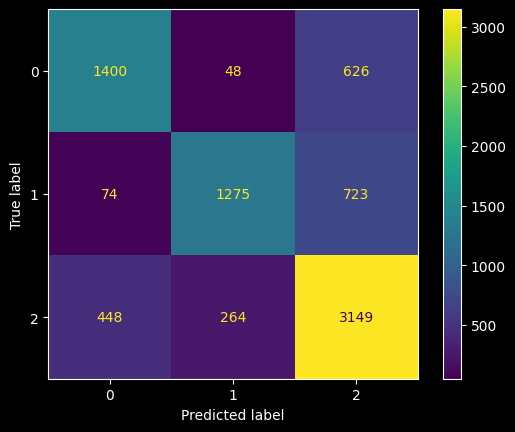

In [53]:
cm_display=ConfusionMatrixDisplay(cm,display_labels=[0,1,2])
cm_display.plot()
plt.show()

### Prediction On Scaled Data

In [54]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_s=ss.fit_transform(x_train)
x_test_s=ss.transform(x_test)

In [55]:
LR=LogisticRegression()
LR.fit(x_train_s,y_train)

LogisticRegression()

In [56]:
y_pred_tr=LR.predict(x_train_s)
y_pred_tst=LR.predict(x_test_s)

In [57]:
print('Accuracy score on Training set (Scaled data):',accuracy_score(y_train,y_pred_tr)*100)
print('Accuracy score on Testing set (Scaled data) :',accuracy_score(y_test,y_pred_tst)*100)

Accuracy score on Training set (Scaled data): 82.27745339869486
Accuracy score on Testing set (Scaled data) : 82.71512426626701


In [58]:
# classificatio Report
print(classification_report(y_test,y_pred_tst))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2074
           1       0.80      0.70      0.75      2072
           2       0.80      0.89      0.85      3861

    accuracy                           0.83      8007
   macro avg       0.84      0.81      0.82      8007
weighted avg       0.83      0.83      0.83      8007



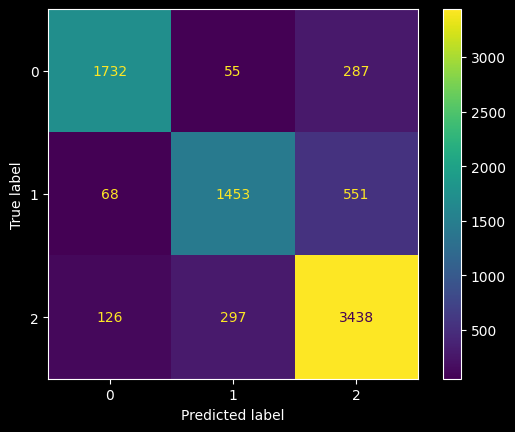

In [59]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_tst)
cm_display=ConfusionMatrixDisplay(cm,display_labels=[0,1,2])
cm_display.plot()
plt.show()

### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(max_depth=26,min_samples_split=6,min_samples_leaf=4)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=26, min_samples_leaf=4, min_samples_split=6)

In [61]:
y_pred_tr=DT.predict(x_train)
y_pred_tst=DT.predict(x_test)

In [62]:
print('Accuracy score on Training set (Decision Tree ) :',accuracy_score(y_train,y_pred_tr)*100)
print('Accuracy score on Testing set (Decision Tree )  :',accuracy_score(y_test,y_pred_tst)*100)

Accuracy score on Training set (Decision Tree ) : 93.47737846192275
Accuracy score on Testing set (Decision Tree )  : 86.98638691145248


In [63]:
DT.get_depth()

26

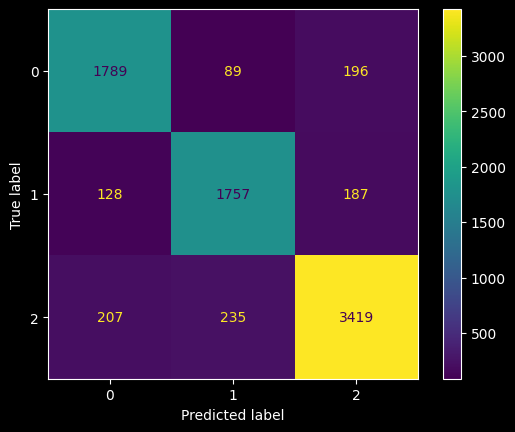

In [64]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_tst)
cm_display=ConfusionMatrixDisplay(cm,display_labels=[0,1,2])
cm_display.plot()
plt.show()

### Random Forest

In [65]:
RF=RandomForestClassifier(n_estimators=122,min_samples_split=3,min_samples_leaf=2)  
RF.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=3,
                       n_estimators=122)

In [66]:
y_pred_tr=RF.predict(x_train)
y_pred_tst=RF.predict(x_test)

In [67]:
print('Accuracy score on Training set (Random Forest) :',accuracy_score(y_train,y_pred_tr)*100)
print('Accuracy score on Testing set (Random Forest)  :',accuracy_score(y_test,y_pred_tst)*100)

Accuracy score on Training set (Random Forest) : 94.60767477440909
Accuracy score on Testing set (Random Forest)  : 90.9204446109654


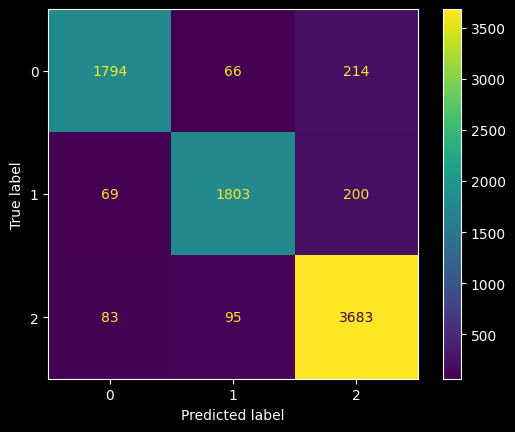

In [68]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_tst)
cm_display=ConfusionMatrixDisplay(cm,display_labels=[0,1,2])
cm_display.plot()
plt.show()

In [69]:
# classificatio Report
print(classification_report(y_test,y_pred_tst))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2074
           1       0.92      0.87      0.89      2072
           2       0.90      0.95      0.93      3861

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



In [70]:
# Cross validation score
from sklearn.model_selection import cross_val_score
print('For Training data:',cross_val_score(RF,x_train,y_train,cv=5,scoring='accuracy'))

For Training data: [0.90649391 0.90883547 0.89992194 0.90226386 0.91178767]


### Gradient boost

In [71]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [72]:
y_pred_tr=GB.predict(x_train)
y_pred_tst=GB.predict(x_test)

In [73]:
print('Accuracy on Training set (Gradient Boosting):',accuracy_score(y_train,y_pred_tr)*100)
print('Accuracy on Testing set (Gradient Boosting):' ,accuracy_score(y_test,y_pred_tst)*100)

Accuracy on Training set (Gradient Boosting): 91.34168045711431
Accuracy on Testing set (Gradient Boosting): 91.13275883601848


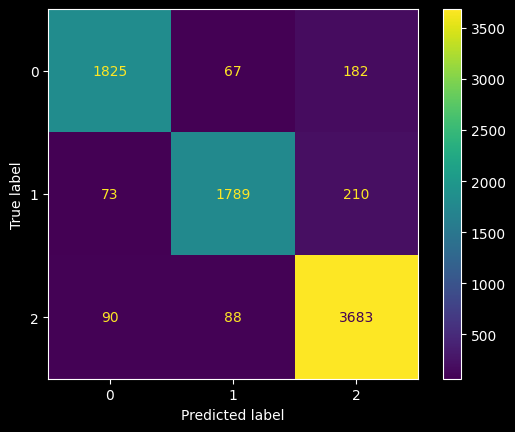

In [74]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_tst)
cm_display=ConfusionMatrixDisplay(cm,display_labels=[0,1,2])
cm_display.plot()
plt.show()

### Bagging

In [75]:
BG=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=12)
BG.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=12)

In [76]:
y_pred_tr=BG.predict(x_train)
y_pred_test=BG.predict(x_test)

In [77]:
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(accuracy_score(y_train,y_pred_tr)*100))

print('----------------------------------')    

print('Model performance for Test set')
print("- Accuracy: {:.4f}".format(accuracy_score(y_test,y_pred_tst)*100))
    

Model performance for Training set
- Accuracy: 96.4093
----------------------------------
Model performance for Test set
- Accuracy: 91.1328


### Support Vector machine

In [78]:
from sklearn.svm import SVC
svn=SVC()
svn.fit(x_train,y_train)

SVC()

In [79]:
y_pred_tr=svn.predict(x_train)
y_pred_tst=svn.predict(x_test)

In [80]:
print('Accuracy on Training set (SVM):',accuracy_score(y_train,y_pred_tr)*100)
print('Accuracy on Testing set (SVM):' ,accuracy_score(y_test,y_pred_tst)*100)

Accuracy on Training set (SVM): 90.09897898648016
Accuracy on Testing set (SVM): 89.88385162982391


### Roc Curve

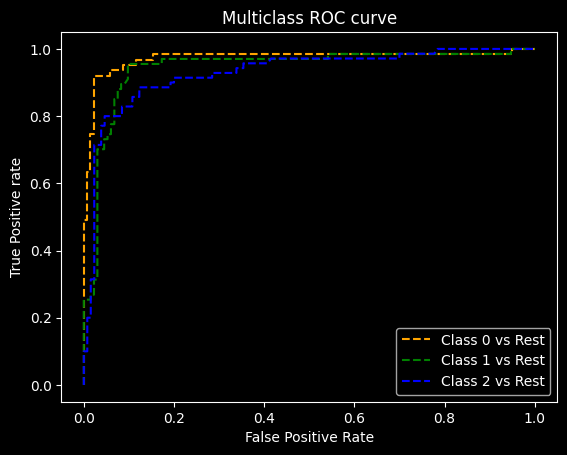

In [81]:
# multi-class classification
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# generate 2 class dataset
x, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fit model
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,pred_prob[:,i], pos_label=i)

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Actual vs Predicted

In [84]:
x=df.drop('EngagementLevel',axis=1)
y=df['EngagementLevel']

In [85]:
data=x.head(10)

In [86]:
y_pred=RF.predict(data)
y_pred

array([2, 2, 0, 2, 2, 1, 1, 2, 2, 0])

In [87]:
data['Actual']=y.head(10)
data['Predicted']=y_pred
data[['Actual','Predicted']]

Actual  Predicted
0       2          2
1       2          2
2       0          0
3       2          2
4       2          2
5       1          1
6       1          1
7       2          2
8       2          2
9       0          0

### Accuracy table for different models

In [82]:
df_accuracy=pd.DataFrame(index=list(range(1,8)))
df_accuracy['Model Name']=['Logistic Regression','Scaled Data','Decision Tree','Random Forest','GradientBoost','Bagging',\
                            'SVM']
df_accuracy['Accuracy Score(Training)']=np.round([72.4232678677366,82.27745339869486,93.47737846192275,94.610797139913,\
                                           91.34168045711431,91.34168045711431,90.09897898648016],2)
df_accuracy['Accuracy Score(Testing)']=np.round([72.73635568877232,82.71512426626701,86.99887598351442,90.99537904333708,91.13275883601848,\
                                           91.1328,89.8838516298239],2)
df_accuracy['Error']=100-df_accuracy['Accuracy Score(Testing)']

df_accuracy

Model Name  Accuracy Score(Training)  Accuracy Score(Testing)  \
1  Logistic Regression                     72.42                    72.74   
2          Scaled Data                     82.28                    82.72   
3        Decision Tree                     93.48                    87.00   
4        Random Forest                     94.61                    91.00   
5        GradientBoost                     91.34                    91.13   
6              Bagging                     91.34                    91.13   
7                  SVM                     90.10                    89.88   

   Error  
1  27.26  
2  17.28  
3  13.00  
4   9.00  
5   8.87  
6   8.87  
7  10.12

<Axes: xlabel='Model Name', ylabel='Accuracy Score(Testing)'>

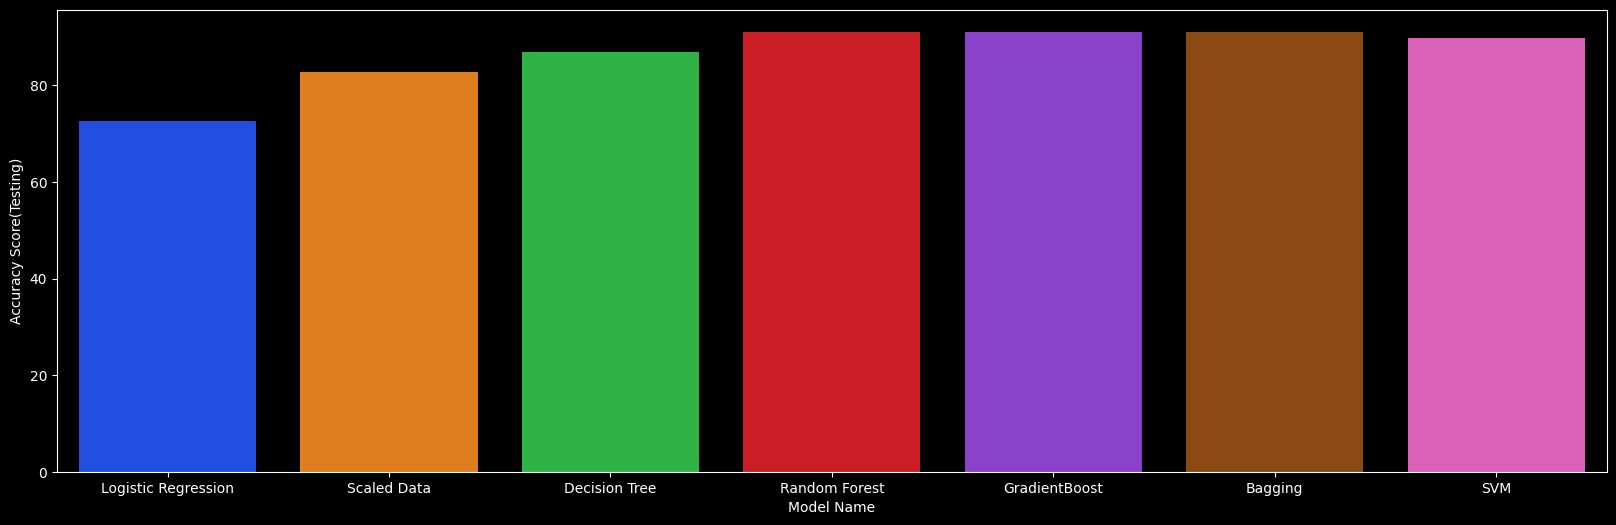

In [83]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_accuracy['Model Name'],y=df_accuracy['Accuracy Score(Testing)'],palette='bright')

In [2]:
# LR=LogisticRegression()
# DT=DecisionTreeClassifier(max_depth=26,min_samples_split=6,min_samples_leaf=4)
# RF=RandomForestClassifier(n_estimators=122,min_samples_split=3,min_samples_leaf=2)
# BG=BaggingClassifier()
# ADB=AdaBoostClassifier()
# GB=GradientBoostingClassifier()
# XGB=XGBClassifier()
# KNN=KNeighborsClassifier()
# NB=GaussianNB()
# SVN=SVC()

In [3]:
# lst=[LR,DT,RF,BG,ADB,GB,XGB,KNN,NB,SVN]

In [1]:
# for i in lst:
#     print('Classifier :',i)
#     i.fit(x_train,y_train)
#     y_pred_tr=i.predict(x_train)
#     y_pred_tst=i.predict(x_test)
#     print('Accuracy Score on Training Data',accuracy_score(y_train,y_pred_tr)*100)
#     print('Accuracy Score on Testing Data',accuracy_score(y_test,y_pred_tst)*100)
#     print('********************************************************')
#     print('********************************************************')
    